Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
DATA_PATH = '../data/'

cars_df = pd.read_csv(DATA_PATH + "data.csv")

In [3]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

# Choose Target
Choose your target. Which column in your tabular dataset will you predict?

For my dataset I have chosen to predict Manufacturer suggested retail price (MSRP).

# Problem Type
Is your problem regression or classification?

Because MSRP is a continuous quantitative target my problem will be regression.

# How is your target distributed?
See plot below

/Users/eric/anaconda3/envs/unit2/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


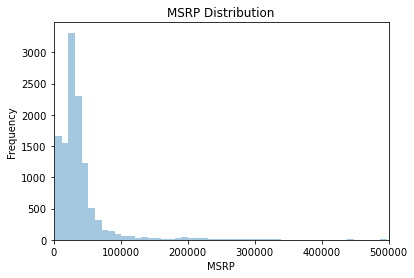

In [61]:
sns.distplot(cars_df['MSRP'], hist=True, kde=False)
plt.xlim(0, 500000)

plt.xlabel("MSRP")
plt.ylabel("Frequency")
plt.title("MSRP Distribution")
plt.show()


As you can see from the above hist plot, my data is extremely right-skewed therefore log-transformation is needed.

# Log Transformation of MSRP

In [49]:
cars_df['MSRP_log'] = np.log1p(cars_df['MSRP'])

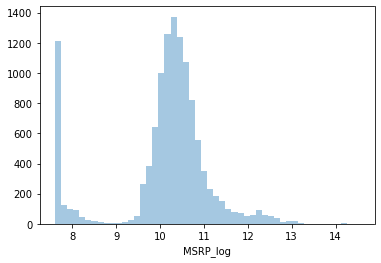

In [51]:
sns.distplot(cars_df['MSRP_log'], hist=True, kde=False);

# Evaluation Metric

- For my dataset I will be you Adjusted $R^2$ as my evalution metric because I am dealing with multiple regression.

# Addressing Outliers

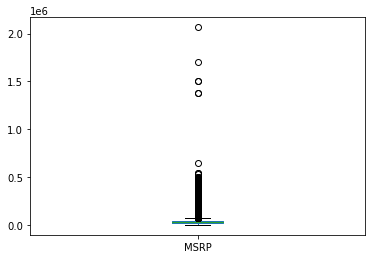

In [56]:
# Box plot for easy visualization of outliers
cars_df['MSRP'].plot(kind='box');

- According to the boxplot above there appear to be outliers at about 500000 and beyond. I will choose 500000 as my cutoff for eliminating outliers

In [57]:
# dropping outliers
cars_df.drop(cars_df[cars_df["MSRP"] >= 500000].index, inplace=True)

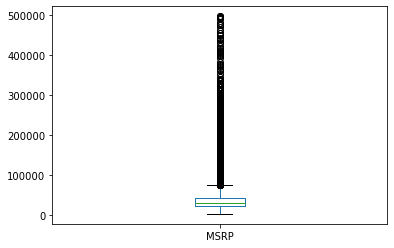

In [60]:
# Visualize removal of outliers
cars_df['MSRP'].plot(kind='box');

# Choose Target/Feature Matrix
- As a preliminiary choice before any feature engineering and minimal EDA I will be using all included features in my dataset for my feature matrix and I have a singular target -- in this case MSRP. See above for addressing outliers. I will use a random train, validate, test split. I will use 80/20 train/test split.